<a href="https://colab.research.google.com/github/moatazkrimchi/Deep-learning/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importer les packages 
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [2]:
# chargement de la base de données 
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


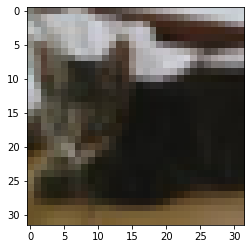

In [3]:
plt.imshow(X_train[9])

In [4]:
X_train[9]

array([[[125, 125, 116],
        [110, 101,  91],
        [102,  90,  83],
        ...,
        [202, 207, 214],
        [200, 205, 212],
        [202, 208, 214]],

       [[142, 146, 142],
        [146, 144, 139],
        [176, 172, 170],
        ...,
        [195, 201, 205],
        [198, 205, 209],
        [204, 211, 215]],

       [[180, 185, 183],
        [143, 146, 146],
        [156, 157, 157],
        ...,
        [122, 111, 113],
        [139, 128, 131],
        [158, 147, 150]],

       ...,

       [[104,  82,  41],
        [101,  80,  39],
        [101,  81,  38],
        ...,
        [126, 103,  67],
        [126, 103,  69],
        [125, 101,  68]],

       [[104,  81,  40],
        [105,  84,  41],
        [109,  88,  43],
        ...,
        [138, 113,  78],
        [137, 113,  80],
        [137, 112,  81]],

       [[105,  83,  42],
        [108,  87,  45],
        [115,  94,  50],
        ...,
        [143, 117,  82],
        [143, 116,  84],
        [144, 116,  86]]

In [5]:
# normalisation
X_train = X_train/255.0
X_test = X_test/255.0

In [6]:
X_train[9]

array([[[0.49019608, 0.49019608, 0.45490196],
        [0.43137255, 0.39607843, 0.35686275],
        [0.4       , 0.35294118, 0.3254902 ],
        ...,
        [0.79215686, 0.81176471, 0.83921569],
        [0.78431373, 0.80392157, 0.83137255],
        [0.79215686, 0.81568627, 0.83921569]],

       [[0.55686275, 0.57254902, 0.55686275],
        [0.57254902, 0.56470588, 0.54509804],
        [0.69019608, 0.6745098 , 0.66666667],
        ...,
        [0.76470588, 0.78823529, 0.80392157],
        [0.77647059, 0.80392157, 0.81960784],
        [0.8       , 0.82745098, 0.84313725]],

       [[0.70588235, 0.7254902 , 0.71764706],
        [0.56078431, 0.57254902, 0.57254902],
        [0.61176471, 0.61568627, 0.61568627],
        ...,
        [0.47843137, 0.43529412, 0.44313725],
        [0.54509804, 0.50196078, 0.51372549],
        [0.61960784, 0.57647059, 0.58823529]],

       ...,

       [[0.40784314, 0.32156863, 0.16078431],
        [0.39607843, 0.31372549, 0.15294118],
        [0.39607843, 0

In [7]:
# creation du model 
model = Sequential()


In [8]:
X_train.shape

(50000, 32, 32, 3)

In [9]:
# cree le reseau de convolution (cnn)
model.add(Conv2D(256,(3,3),input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [10]:
#ajouter une chouche de convoluion 
model.add(Conv2D(256,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [11]:
model.add(Flatten())

In [12]:
# le complement connecté
model.add(Dense(64))
model.add(Dense(10))
model.add(Activation('sigmoid'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['sparse_categorical_accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 256)       7168      
                                                                 
 activation (Activation)     (None, 30, 30, 256)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 256)       590080    
                                                                 
 activation_1 (Activation)   (None, 13, 13, 256)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 256)        0         
 2D)                                                    

In [14]:
# entrainer le modèle
model.fit(X_train,y_train,batch_size=32,epochs=10)

Epoch 1/10
  27/1563 [..............................] - ETA: 13:52 - loss: 2.2790 - sparse_categorical_accuracy: 0.1377

KeyboardInterrupt: ignored

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)